In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import datasets, layers, models, losses, Model

In [2]:
train_gen=ImageDataGenerator(rescale=1./255.,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            shear_range=0.2)
valid_gen=ImageDataGenerator(rescale=1./255.)
test_gen=ImageDataGenerator(rescale=1./255.)
train_Data=train_gen.flow_from_directory("crop_image/train",target_size=(150,150),batch_size=32,class_mode="binary")
valid_Data=valid_gen.flow_from_directory("crop_image/test",target_size=(150,150),batch_size=32,class_mode="binary")
#test_Data=test_gen.flow_from_dataframe(test_df,x_col='filename',y_col='labels',target_size=(150,150),batch_size=32,class_mode="binary")

Found 1551 images belonging to 2 classes.
Found 445 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
base_model = VGG16(input_shape=(150,150,3),include_top=False,weights="imagenet")

58892288/58889256 [==============================] - 67s 1us/step


In [5]:
for layer in base_model.layers:
  layer.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation = 'sigmoid')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [8]:
head_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
history = head_model.fit(train_Data, batch_size=64, epochs=10, validation_data=valid_Data)


Epoch 1/10
49/49 [==============================] - 140s 3s/step - loss: 0.0713 - accuracy: 0.9736 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 2/10
49/49 [==============================] - 153s 3s/step - loss: 0.0364 - accuracy: 0.9903 - val_loss: 0.0150 - val_accuracy: 0.9955
Epoch 3/10
49/49 [==============================] - 160s 3s/step - loss: 0.0733 - accuracy: 0.9736 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 4/10
49/49 [==============================] - 166s 3s/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/10
49/49 [==============================] - 168s 3s/step - loss: 0.0213 - accuracy: 0.9910 - val_loss: 4.9547e-04 - val_accuracy: 1.0000
Epoch 6/10
49/49 [==============================] - 164s 3s/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0390 - val_accuracy: 0.9910
Epoch 7/10
49/49 [==============================] - 173s 4s/step - loss: 0.0402 - accuracy: 0.9819 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/1

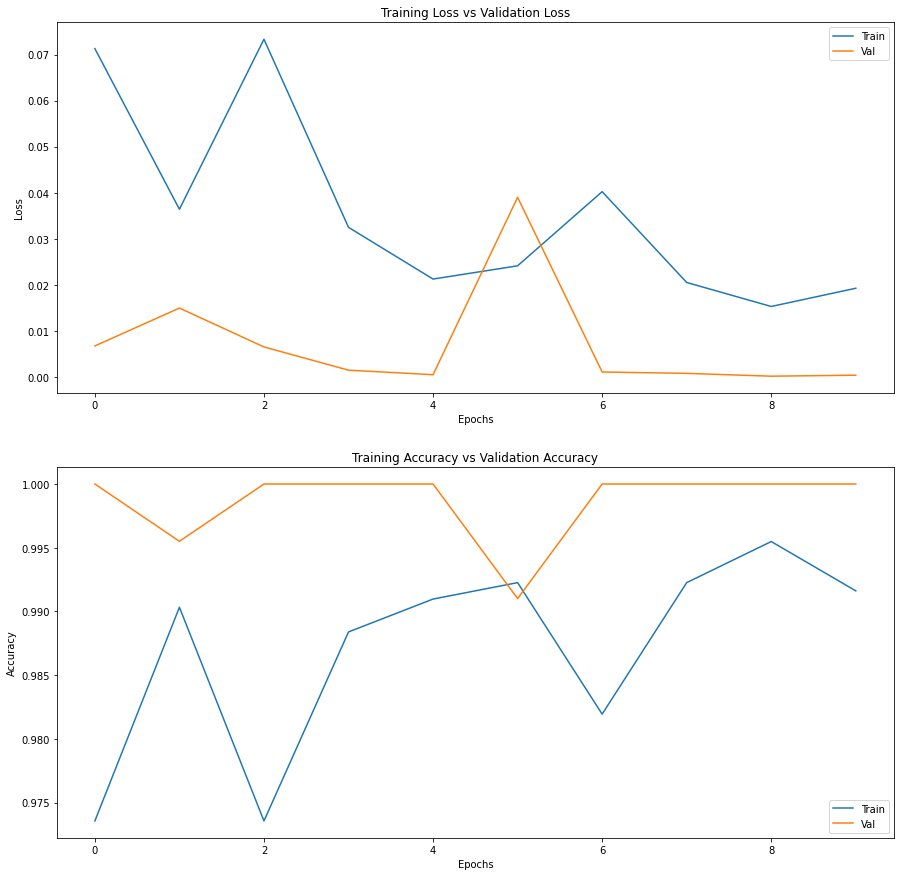

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [4]:
model = load_model("transfer_model.h5")

In [5]:
import cv2 

In [20]:
img = cv2.imread("crop_image/no_item/2022-06-13 16:50:10.561879.jpg")

In [21]:
img = img/255
img = cv2.resize(img, (150, 150))
img = img.reshape((1,150,150,3))

In [22]:
format(model.predict(img)[0][0],".5f")

'1.00000'

In [17]:
train_Data.num_classes

2

In [20]:
model_file_path ="transfer_model.h5"
head_model.save(model_file_path)

In [2]:
from sympy import Point, Line
from sympy import Point, Line
p1, p2, p3 = Point(0, 0), Point(2, 3), Point(-2, 2)
l1 = Line(p1, p2)
l2 = l1.perpendicular_line(p3)
p3 in l2

True

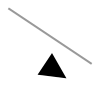

In [3]:
l2.

In [1]:
from shapely.geometry import LineString

a = (210, 554)
b = (140, 968)
cd_length = 6

ab = LineString([a, b])
cd = LineString([(52, 577), (249, 610)])

In [2]:
ab.intersects(cd)

True

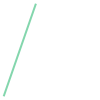

In [12]:
ab

In [ ]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (0, 1)])

In [4]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)